In [5]:
#birden fazla ağacın tahminini değerlendirir.
#baya sağlam

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

In [6]:
hit = pd.read_csv('Hitters.csv')
df=hit.copy()
df=df.dropna()
ms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df['Salary']
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,ms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [7]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [10]:
predicted=rf_model.predict(X_test)

np.sqrt(mean_squared_error(predicted,y_test))

In [13]:
#Tuning.......

## rf_params={'max_depth':list}

In [16]:
rf_params={'max_depth':list(range(1,10)),
          'max_features':[3,5,10,15,17],
          'n_estimators': [100,200,500,1000,2000]}
#estimator sayısı 500 ve 1000 önerilir

In [18]:
rf_model=RandomForestRegressor(random_state=42)
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1)
#n_jobs süreyi kısaltma işlemi bir nevi, işlemciyi tam performanslı kullanma

In [19]:
rf_cv_model.fit(X_train,y_train)

KeyboardInterrupt: 

In [20]:
#çok uzun süreceği için kestim, max depth 8 max features 3
#estimator sayısı ise 200 çıkıyor.

In [22]:
rf_tuned_model=RandomForestRegressor(max_depth=8,max_features=3,n_estimators=200)
rf_tuned_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
predictedtuned=rf_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(predictedtuned,y_test))

345.88572433177507

In [44]:
Importance = pd.DataFrame({'Importance':rf_tuned_model.feature_importances_*100},
                          index = X_train.columns)

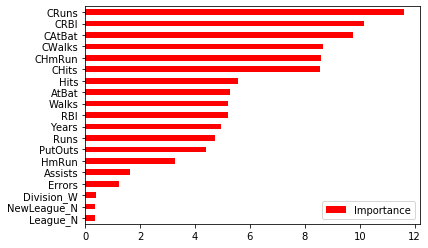

In [45]:
Importance.sort_values(by='Importance',
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r');
